In [1]:
from plantcv import plantcv as pcv
import matplotlib

In [2]:
class options:
    def __init__(self):
        self.image = "./img/fig.jpg"
        self.debug = "plot"
        self.writeimg= False
        self.result = "vis_tutorial_results.json"
        self.outdir = "." # Store the output to the current directory
        
# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

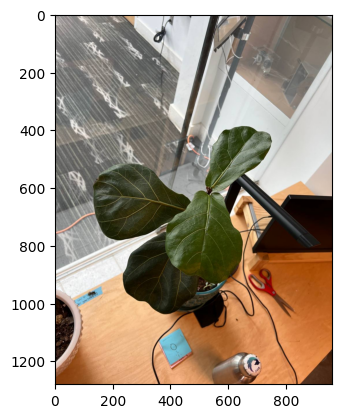

In [4]:
img, path, filename = pcv.readimage(filename=args.image)

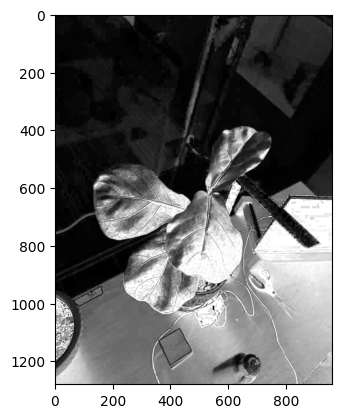

In [5]:
s = pcv.rgb2gray_hsv(rgb_img=img, channel='s')


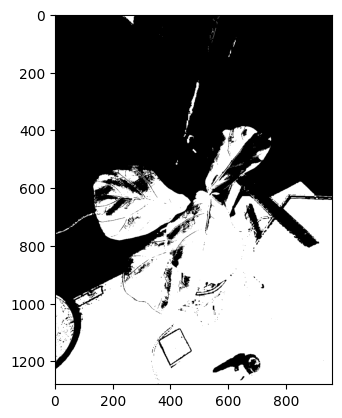

In [6]:
s_thresh = pcv.threshold.binary(gray_img=s, threshold=85, max_value=255, object_type='light')


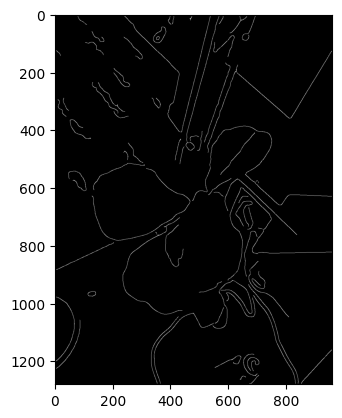

In [10]:
edges = pcv.canny_edge_detect(img, sigma=5)